# Sales

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)

### Uploading the dataset

In [2]:
#Creating the path of the dataset
path = 'sales.xlsx'

#Uploading the dataset from xlsx file
df = pd.read_excel(path)

#Seeing the head of the dataset
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0,32370.0,16185,16185.0,2014-01-01
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0,26420.0,13210,13210.0,2014-01-01
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0,32670.0,21780,10890.0,2014-06-01
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0,13320.0,8880,4440.0,2014-06-01
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0,37050.0,24700,12350.0,2014-06-01


In [3]:
#Seeing the shape of the dataset 
df.shape

(700, 13)

In [4]:
#Seeing the info of the datset
df.info()
#We have datetime64[ns](1), float64(4), int64(4), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    int64         
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    int64         
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), i

In [5]:
#Seeing the columns of the dataset
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date'],
      dtype='object')

In [6]:
#Seeing the describtion of the dataset
df.describe().T
#In some columns, the std is much bigger than the mean, we should look at them 

,count,mean,min,25%,50%,75%,max,std
Units Sold,700.0,1608.294286,200.0,905.0,1542.5,2229.125,4492.5,867.427859
Manufacturing Price,700.0,96.477143,3.0,5.0,10.0,250.0,260.0,108.602612
Sale Price,700.0,118.428571,7.0,12.0,20.0,300.0,350.0,136.775515
Gross Sales,700.0,182759.426429,1799.0,17391.75,37980.0,279025.0,1207500.0,254262.284378
Discounts,700.0,13150.341429,0.0,800.25,2585.0,15956.25,149678.0,22962.948586
Sales,700.0,169609.0718,1655.08,15928.0,35540.2,261077.5,1159200.0,236726.34691
COGS,700.0,145475.211429,918.0,7490.0,22506.0,245607.5,950625.0,203865.506124
Profit,700.0,24133.860371,-40617.5,2805.96,9242.2,22662.0,262200.0,42760.626563
Date,700,2014-04-28 21:36:00,2013-09-01 00:00:00,2013-12-24 06:00:00,2014-05-16 12:00:00,2014-09-08 12:00:00,2014-12-01 00:00:00,NaN


In [7]:
df.isnull().sum()
#As we can see, Discount Band has about 53 missing values

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
Sales                   0
COGS                    0
Profit                  0
Date                    0
dtype: int64

In [8]:
#Dropping missing values
df = df.dropna()
#Checking after dropping
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
dtype: int64

In [9]:
#Looking at duplicated values
df.duplicated().sum()
#As we can see, there is no duplicated values

0

### Segment

In [10]:
df['Segment'].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

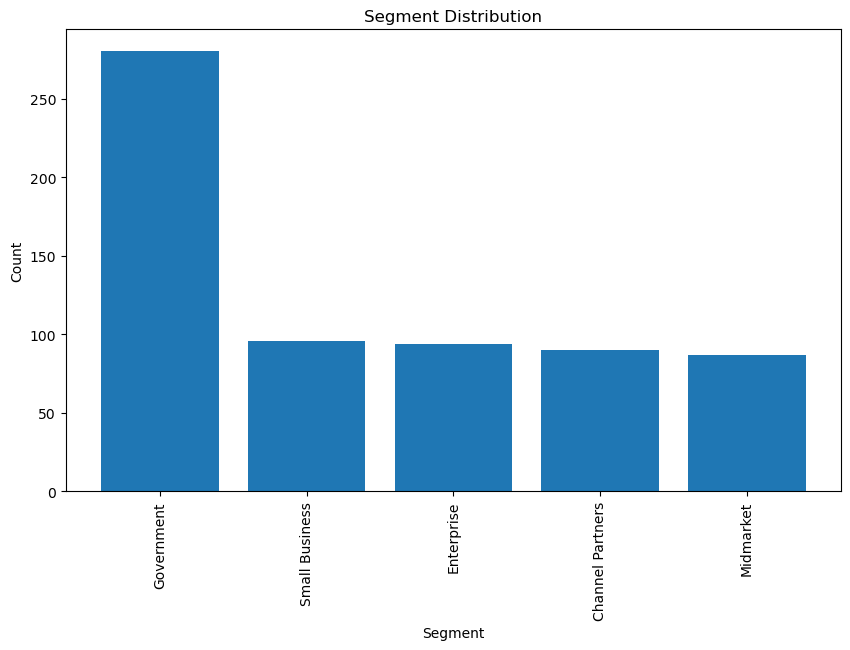

In [11]:
# Plot the column values as a bar plot
plt.bar(df['Segment'].value_counts().index, df['Segment'].value_counts().values)

# Customize the plot
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

#From here we can notice that Government has the highest values, and the others have nearly the same ones.

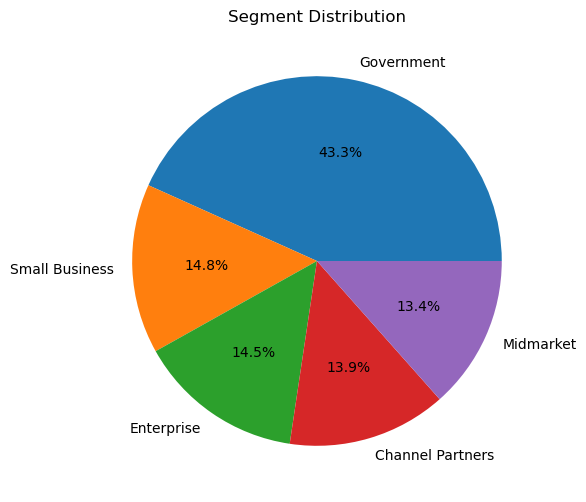

In [12]:
# Calculate the value counts of each segment
segment_counts = df['Segment'].value_counts()

# Plot the value counts as a pie chart
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Segment Distribution')

# Display the plot
plt.show()

#### Relationship between Segment and Sales

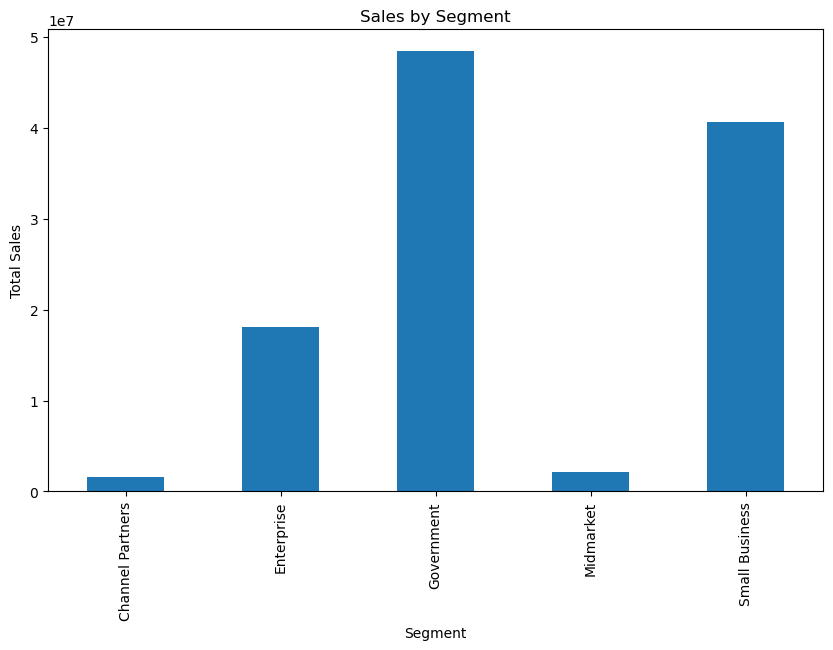

In [13]:
# Create a grouped bar plot
df.groupby('Segment')['Sales'].sum().plot(kind='bar')

# Customize the plot
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Segment')

# Display the plot
plt.show()

#From this, we can notice that 'Government' and 'Small Business' has the highest sales values

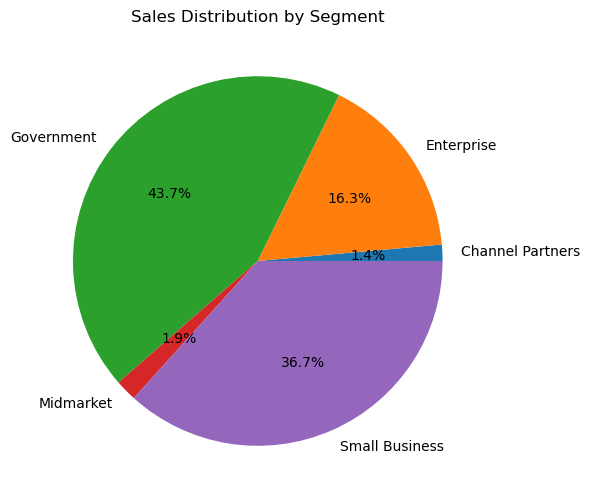

In [14]:
# Calculate the total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Segment')

# Display the plot
plt.show()

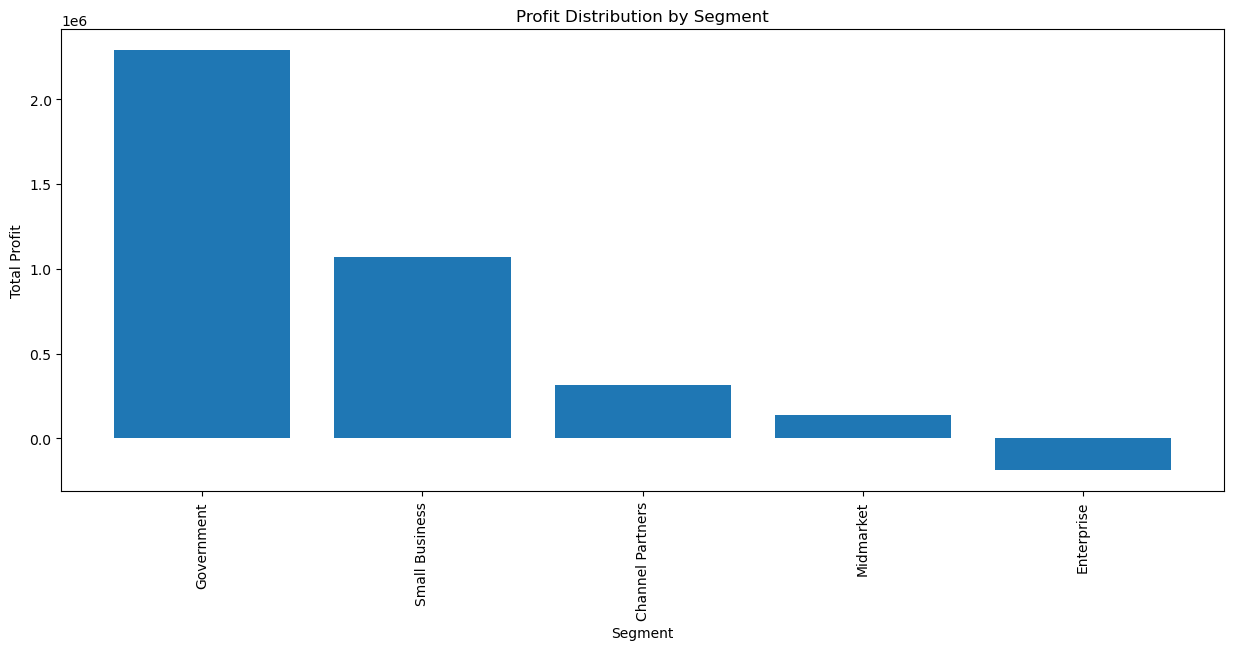

In [15]:
# Calculate the total sales for each Segment
Segment_sales = df.groupby(['Country', 'Segment'])[['Units Sold', 'Sale Price', 'Sales', 'COGS', 'Profit']].sum().round(2).reset_index().sort_values(by='Profit', ascending=False)

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
plt.bar(Segment_sales['Segment'], Segment_sales['Profit'])

# Customize the plot
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Profit Distribution by Segment')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [16]:
# Calculate the total sales for each segment: 
sales_seg = df.groupby('Segment')['Sales'].sum().round()
sales_seg

Segment
Channel Partners     1578618.0
Enterprise          18086694.0
Government          48367533.0
Midmarket            2091333.0
Small Business      40658518.0
Name: Sales, dtype: float64

In [17]:
# Calculate the total profit for each segment: 
sales_seg = df.groupby('Segment')['Profit'].sum().round()
sales_seg

Segment
Channel Partners     1150321.0
Enterprise           -675546.0
Government          10270950.0
Midmarket             563253.0
Small Business       3848268.0
Name: Profit, dtype: float64

In [18]:
# Calculate the total sales for each segment
sales_seg = df.groupby('Segment')['Sales'].sum().round()
profit_seg = df.groupby('Segment')['Profit'].sum().round()

# Create a DataFrame from the calculated values
df_segment = pd.DataFrame({'Total Sales': sales_seg, 'Total Profit': profit_seg})

# Print the DataFrame
print(df_segment)

                  Total Sales  Total Profit
Segment                                    
Channel Partners    1578618.0     1150321.0
Enterprise         18086694.0     -675546.0
Government         48367533.0    10270950.0
Midmarket           2091333.0      563253.0
Small Business     40658518.0     3848268.0


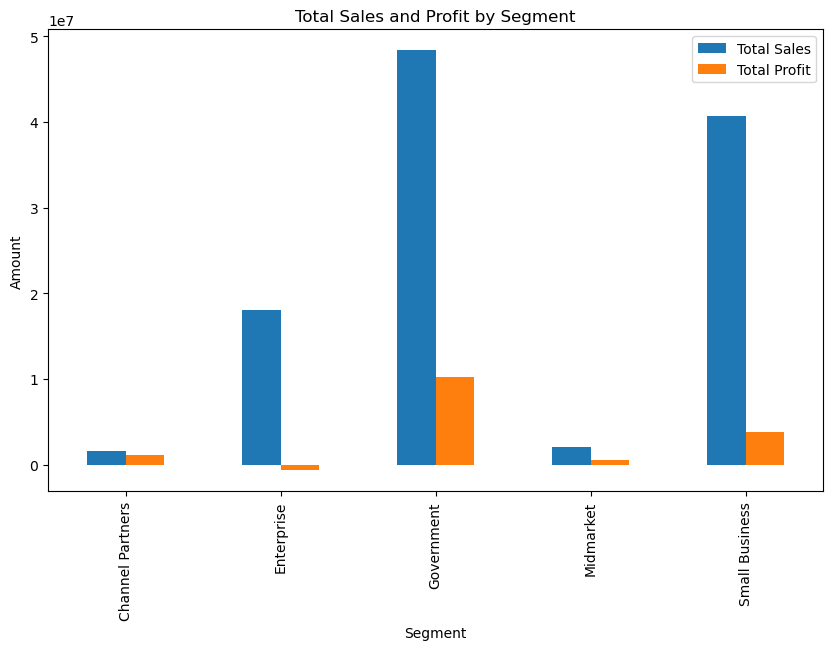

In [19]:
# Plot the bar chart
df_segment.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Total Sales and Profit by Segment')
plt.show()

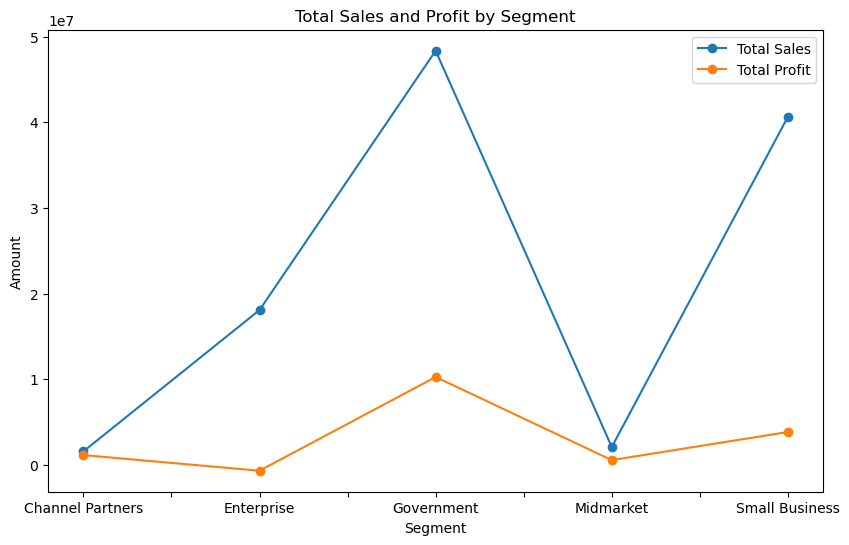

In [20]:
# Plot the line chart
df_segment.plot(kind='line', marker='o')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Total Sales and Profit by Segment')
plt.legend()
plt.show()

### Looking at Country

In [21]:
df['Country'].unique()

array(['France', 'Canada', 'United States of America', 'Mexico',
       'Germany'], dtype=object)

In [22]:
#Looking at the value_counts 
df['Country'].value_counts()
#As we can see, all of them has the same value counts

Country
United States of America    132
Mexico                      132
France                      131
Canada                      128
Germany                     124
Name: count, dtype: int64

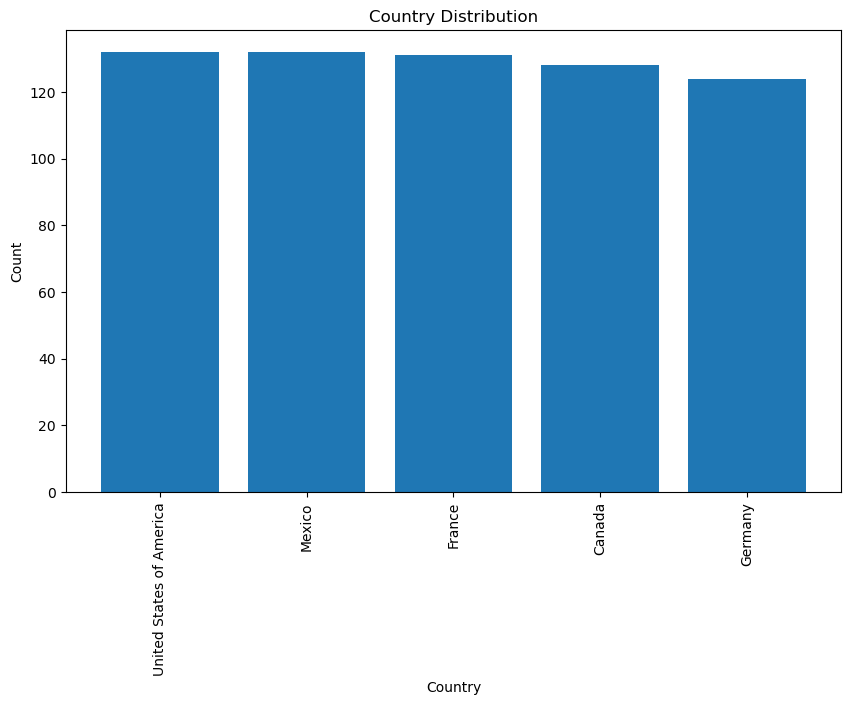

In [23]:
# Plot the column values as a bar plot
plt.bar(df['Country'].value_counts().index, df['Country'].value_counts().values)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

#We can notice from the graph that, they all have the same values

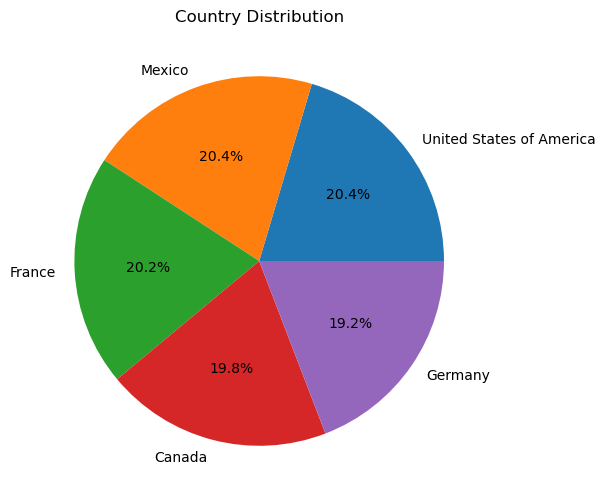

In [24]:
# Calculate the value counts of each Country
Country_counts = df['Country'].value_counts()

# Plot the value counts as a pie chart
plt.pie(Country_counts, labels=Country_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Country Distribution')

# Display the plot
plt.show()

#### Relationship between Country and Sales

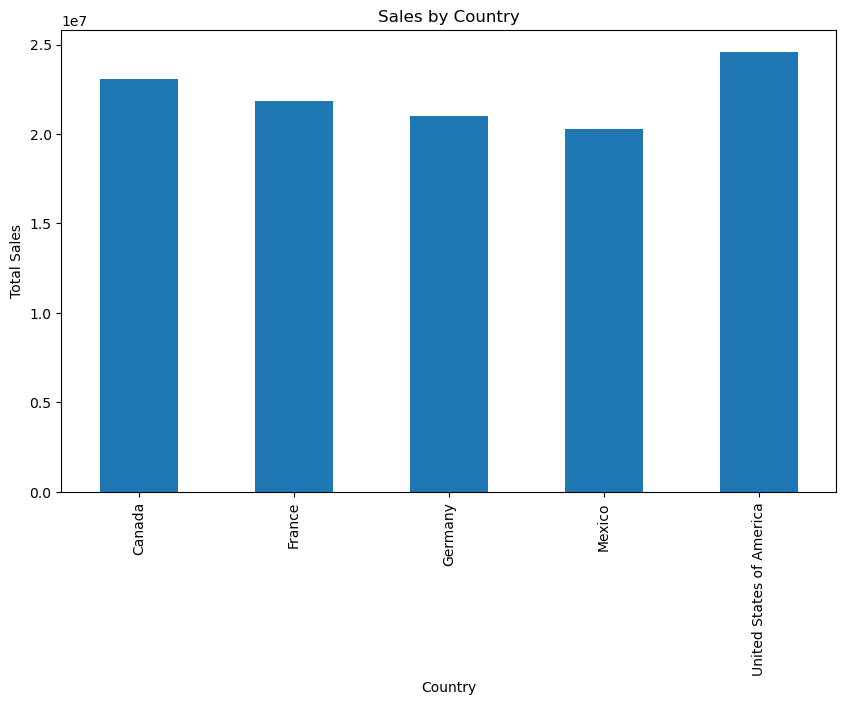

In [25]:
# Create a grouped bar plot
df.groupby('Country')['Sales'].sum().plot(kind='bar')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')

# Display the plot
plt.show()

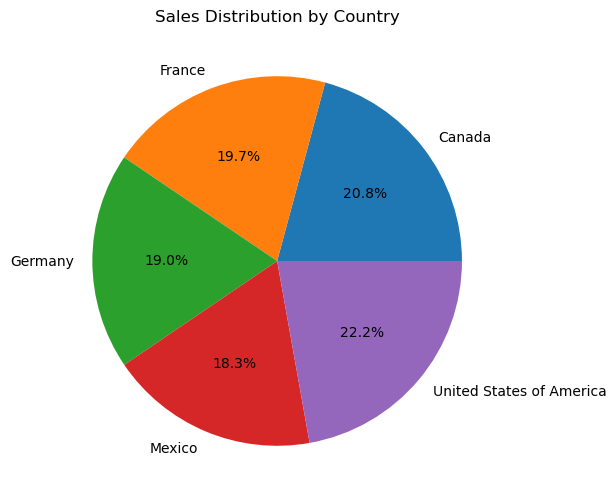

In [26]:
# Calculate the total sales for each Country
Country_sales = df.groupby('Country')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(Country_sales, labels=Country_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Country')

# Display the plot
plt.show()

#From here, we can notice that these countries have nearly the same sales values, 
#but US and Canada have the nearly the highest values compared with the other countries

In [27]:
# Calculate the average profit per country
df.groupby('Country')['Profit'].mean()

Country
Canada                      24575.174883
France                      24557.372366
Germany                     24962.970323
Mexico                      21011.675076
United States of America    22164.088371
Name: Profit, dtype: float64

In [28]:
df.groupby('Country')['Sales'].mean()

Country
Canada                      180160.667070
France                      166693.796031
Germany                     169511.550968
Mexico                      153660.076591
United States of America    186232.433068
Name: Sales, dtype: float64

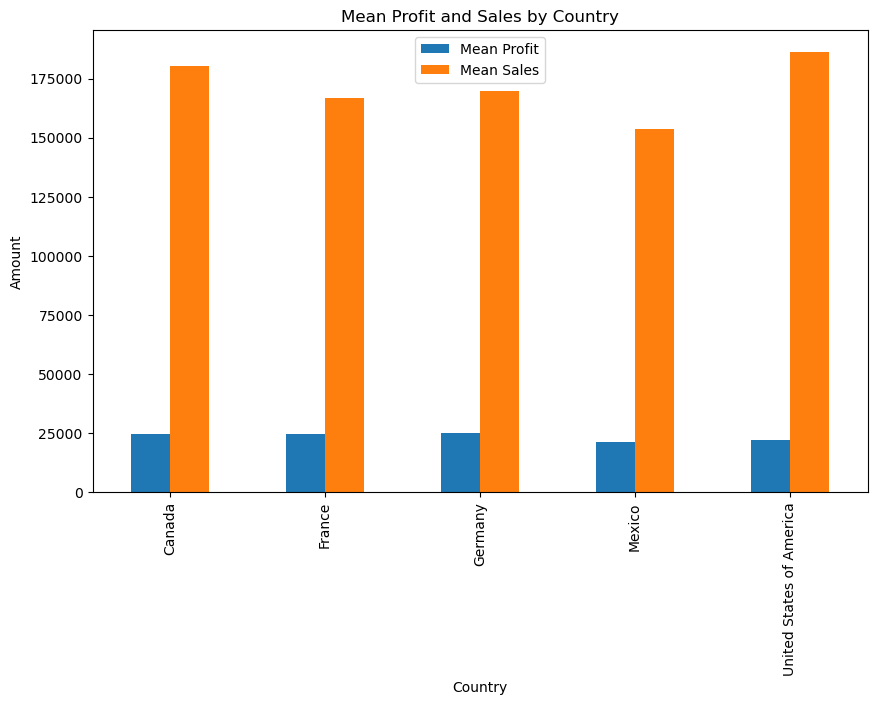

In [29]:
# Calculate the mean profit and mean sales for each country
mean_profit_country = df.groupby('Country')['Profit'].mean()
mean_sales_country = df.groupby('Country')['Sales'].mean()

# Create a DataFrame from the calculated values
df_country = pd.DataFrame({'Mean Profit': mean_profit_country, 'Mean Sales': mean_sales_country})

# Plot the bar chart
df_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.title('Mean Profit and Sales by Country')
plt.legend()
plt.show()

### Looking at Product

In [30]:
df['Product'].unique()

array(['Paseo', 'Velo', 'VTT', 'Carretera', 'Montana', 'Amarilla'],
      dtype=object)

In [31]:
df['Product'].value_counts()

Product
Paseo        187
Velo         102
VTT          102
Carretera     87
Amarilla      86
Montana       83
Name: count, dtype: int64

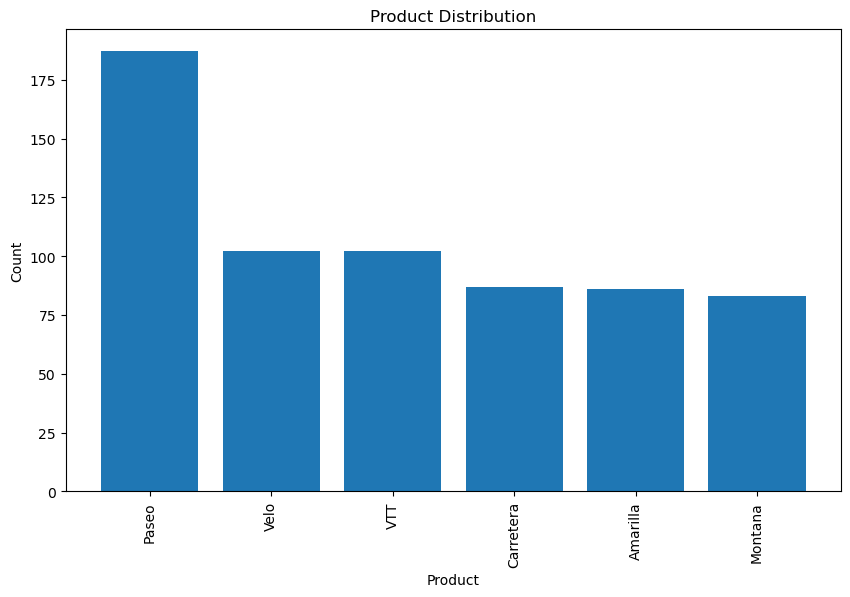

In [32]:
# Plot the column values as a bar plot
plt.bar(df['Product'].value_counts().index, df['Product'].value_counts().values)

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

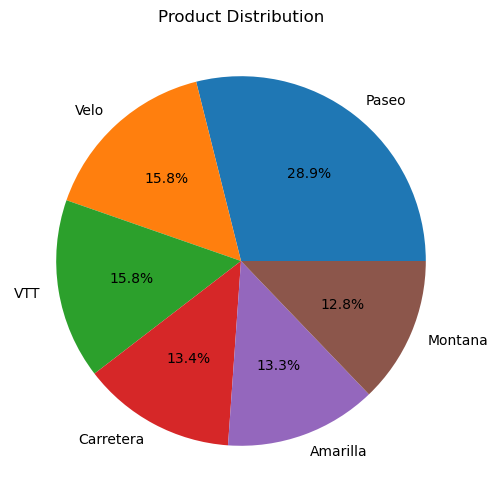

In [33]:
# Calculate the value counts of each Product
Product_counts = df['Product'].value_counts()

# Plot the value counts as a pie chart
plt.pie(Product_counts, labels=Product_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Product Distribution')

# Display the plot
plt.show()

#From the chart, we can see that Paseo has the highest values

#### Relationship between Product and Sales

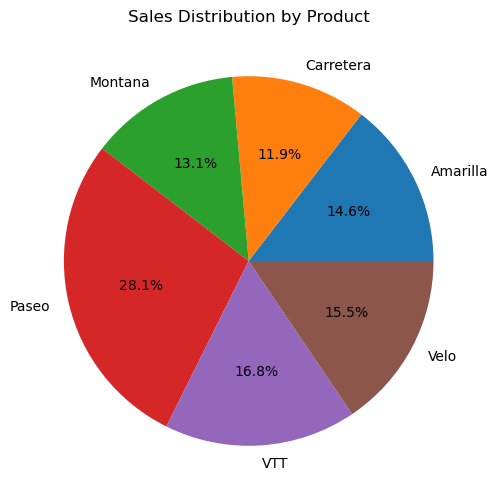

In [34]:
# Calculate the total sales for each Product
Product_sales = df.groupby('Product')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(Product_sales, labels=Product_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Product')

# Display the plot
plt.show()

#Also, we can see that Paseo has the highest sales value compared with the others

In [35]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date'],
      dtype='object')

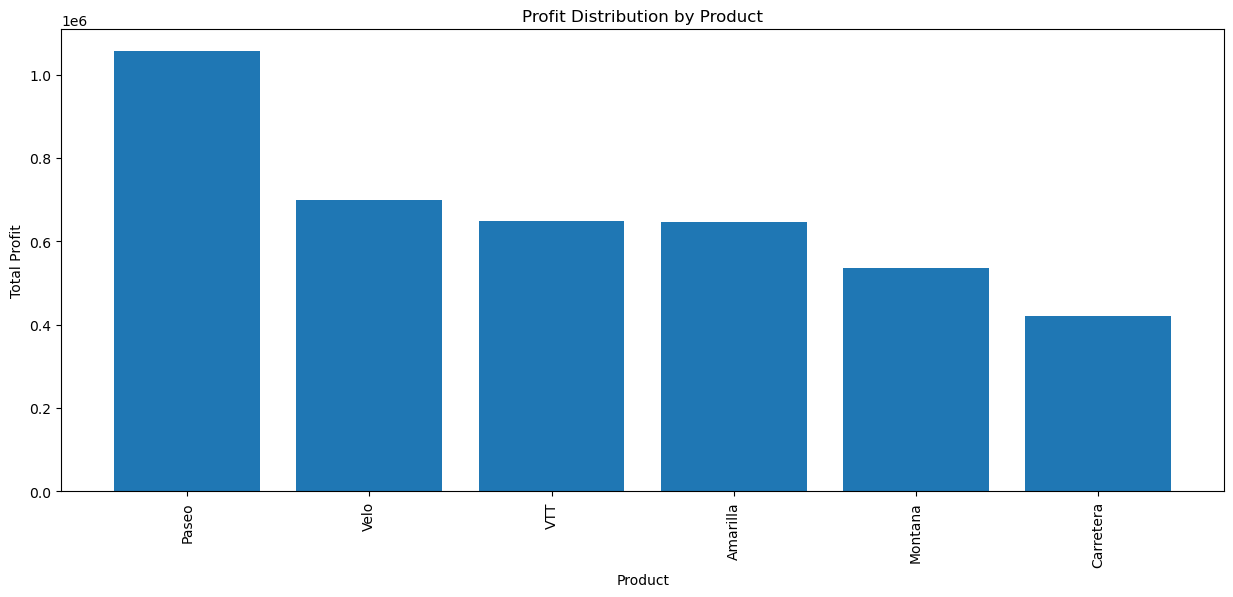

In [36]:
# Calculate the total sales for each Product
product_sales = df.groupby(['Country', 'Product'])[['Units Sold', 'Sale Price', 'Sales', 'COGS', 'Profit']].sum().round(2).reset_index().sort_values(by='Profit', ascending=False)

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
plt.bar(product_sales['Product'], product_sales['Profit'])

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Profit Distribution by Product')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

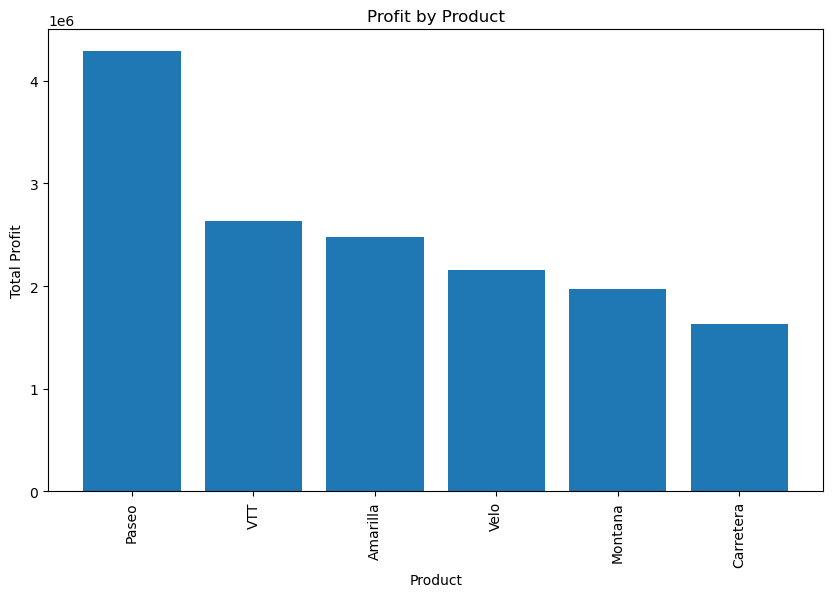

In [37]:
# Calculate the total profit for each Product
product_profit = df.groupby('Product')['Profit'].sum().round(2).reset_index().sort_values(by='Profit', ascending=False)

# Create a bar plot
plt.bar(product_profit['Product'], product_profit['Profit'])

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Profit by Product')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [38]:
# Calculate the total sales for each product: 
df.groupby('Product')['Sales'].sum().round()

Product
Amarilla     16141043.0
Carretera    13143928.0
Montana      14565241.0
Paseo        31095213.0
VTT          18615485.0
Velo         17221786.0
Name: Sales, dtype: float64

In [39]:
# Calculate the total profit for each product: 
df.groupby('Product')['Profit'].sum().round()

Product
Amarilla     2480938.0
Carretera    1633560.0
Montana      1971923.0
Paseo        4286028.0
VTT          2630536.0
Velo         2154262.0
Name: Profit, dtype: float64

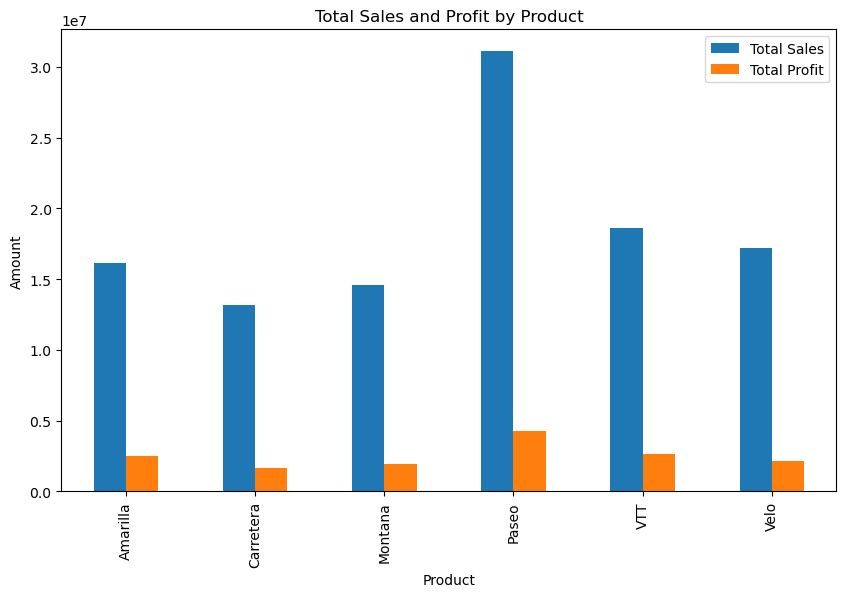

In [40]:
# Calculate the total sales and total profit for each product
total_sales_product = df.groupby('Product')['Sales'].sum().round()
total_profit_product = df.groupby('Product')['Profit'].sum().round()

# Create a DataFrame from the calculated values
df_product = pd.DataFrame({'Total Sales': total_sales_product, 'Total Profit': total_profit_product})

# Plot the bar chart
df_product.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Amount')
plt.title('Total Sales and Profit by Product')
plt.legend()
plt.show()

### Looking at Discount Band

In [41]:
df['Discount Band'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [42]:
df['Discount Band'].value_counts()

Discount Band
High      245
Medium    242
Low       160
Name: count, dtype: int64

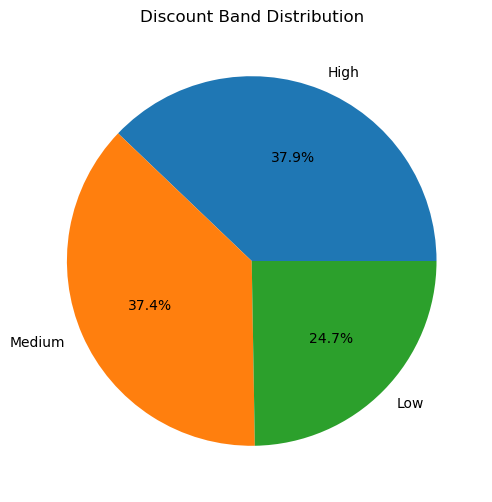

In [43]:
# Calculate the value counts of each Discount Band
Discount_Band_counts = df['Discount Band'].value_counts()

# Plot the value counts as a pie chart
plt.pie(Discount_Band_counts, labels=Discount_Band_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Discount Band Distribution')

# Display the plot
plt.show()

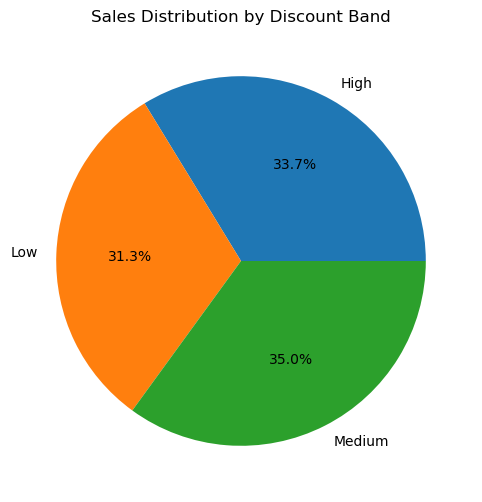

In [44]:
# Calculate the total sales for each Product
Discount_Band_sales = df.groupby('Discount Band')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(Discount_Band_sales, labels=Discount_Band_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Discount Band')

# Display the plot
plt.show()


In [45]:
# Calculate the average discount rate or impact of discounts on sales
df.groupby('Discount Band')['Sales'].mean()

Discount Band
High      152540.762143
Low       216436.116875
Medium    160249.714194
Name: Sales, dtype: float64

In [46]:
# Calculate the average discount rate or impact of discounts on profit
df.groupby('Discount Band')['Profit'].mean()

Discount Band
High      13832.109082
Low       38680.360625
Medium    23055.879483
Name: Profit, dtype: float64

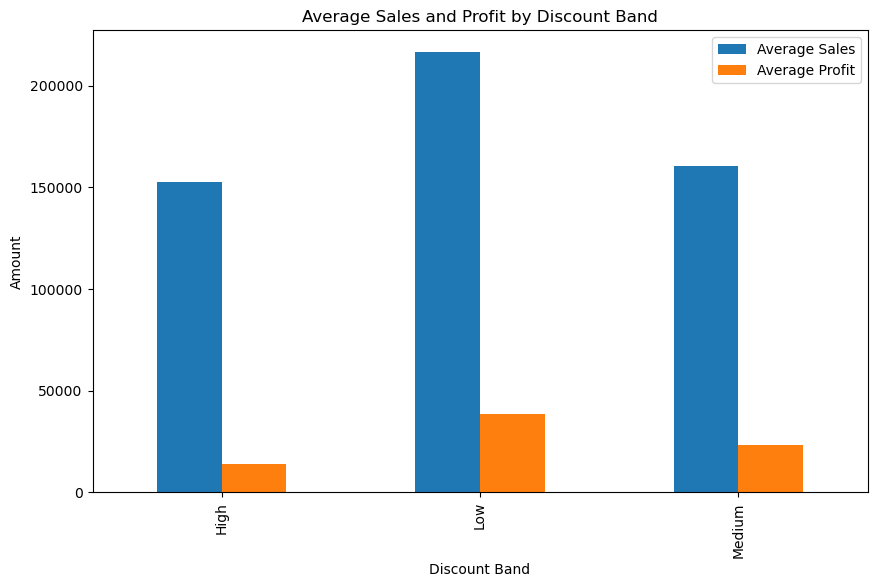

In [47]:
avg_sales_discount = df.groupby('Discount Band')['Sales'].mean()
avg_profit_discount = df.groupby('Discount Band')['Profit'].mean()

# Create a DataFrame from the calculated values
df_discount = pd.DataFrame({'Average Sales': avg_sales_discount, 'Average Profit': avg_profit_discount})

# Plot the bar chart
df_discount.plot(kind='bar')
plt.xlabel('Discount Band')
plt.ylabel('Amount')
plt.title('Average Sales and Profit by Discount Band')
plt.legend()
plt.show()

In [48]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date'],
      dtype='object')

### Looking at Units Sold

In [49]:
df['Units Sold']

53     3945.0
54     2296.0
55     1030.0
56      639.0
57     1326.0
        ...  
695    2475.0
696     546.0
697    1368.0
698     723.0
699    1806.0
Name: Units Sold, Length: 647, dtype: float64

In [50]:
df['Units Sold'].describe()

count     647.000000
mean     1606.866306
std       872.940088
min       200.000000
25%       887.500000
50%      1531.000000
75%      2258.000000
max      4492.500000
Name: Units Sold, dtype: float64

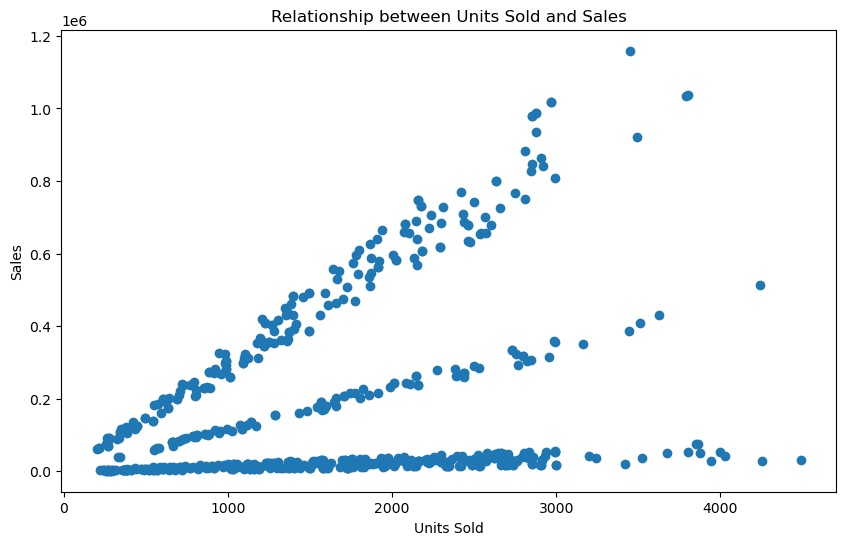

In [51]:
# Scatter plot: Units Sold vs. Sales
plt.scatter(df['Units Sold'], df['Sales'])
plt.xlabel('Units Sold')
plt.ylabel('Sales')
plt.title('Relationship between Units Sold and Sales')
plt.show()

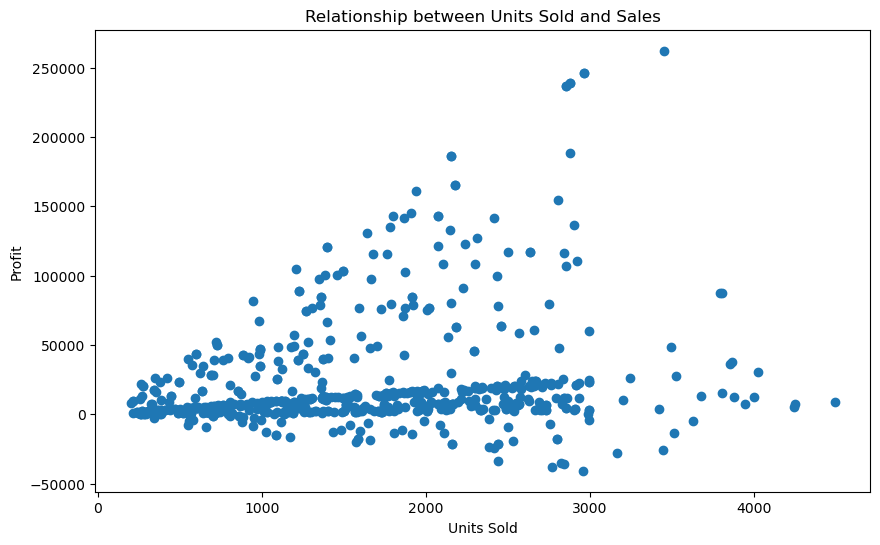

In [52]:
plt.scatter(df['Units Sold'], df['Profit'])
plt.xlabel('Units Sold')
plt.ylabel('Profit')
plt.title('Relationship between Units Sold and Sales')
plt.show()

### Looking at Manufacturing Price

In [53]:
df['Manufacturing Price'].value_counts()

Manufacturing Price
10     187
120    102
250    102
3       87
260     86
5       83
Name: count, dtype: int64

In [54]:
df['Manufacturing Price'].describe()

count    647.000000
mean      96.825348
std      108.559647
min        3.000000
25%        5.000000
50%       10.000000
75%      250.000000
max      260.000000
Name: Manufacturing Price, dtype: float64

In [55]:
# Calculate Manufacturing Price
df['Manufacturing Price'] = df['Profit'] / df['Sales']

# Print the Manufacturing Price column
df['Manufacturing Price']

53     0.278499
54     0.326599
55     0.278499
56     0.278499
57     0.278499
         ...   
695    0.019608
696    0.019608
697    0.159664
698    0.159664
699    0.705882
Name: Manufacturing Price, Length: 647, dtype: float64

### Looking at Sale Price

In [56]:
df['Sale Price'].describe()

count    647.000000
mean     120.561051
std      137.263545
min        7.000000
25%       12.000000
50%       20.000000
75%      300.000000
max      350.000000
Name: Sale Price, dtype: float64

In [57]:
df['Sale Price'].value_counts()

Sale Price
300    96
7      94
125    94
350    93
20     93
12     90
15     87
Name: count, dtype: int64

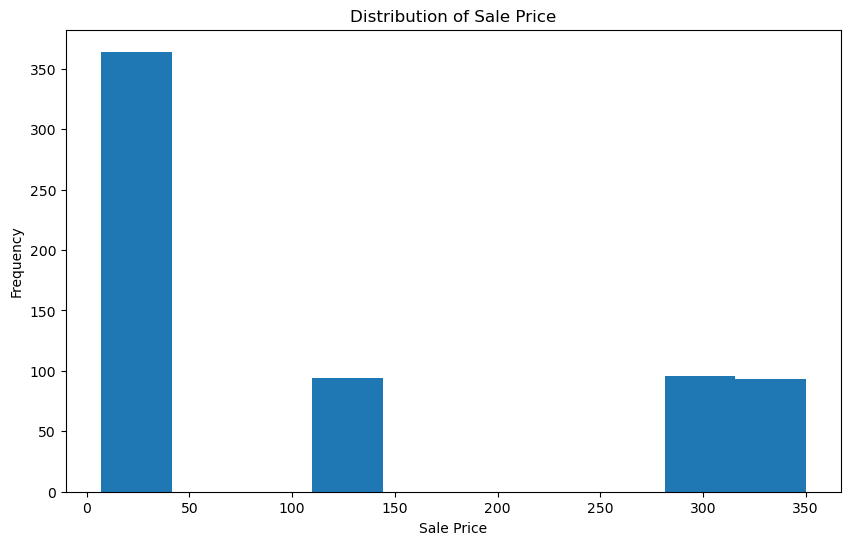

In [58]:
# Plot the 'Sale Price' column as a histogram
plt.hist(df['Sale Price'], bins=10)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

In [59]:
# Calculate profit margin based on sales
df['Profit Margin (Sales)'] = df['Profit'] / df['Sales']

# Calculate profit margin based on gross sales
df['Profit Margin (Gross Sales)'] = df['Profit'] / df['Gross Sales']

# Print the profit margin columns
print(df[['Profit Margin (Sales)', 'Profit Margin (Gross Sales)']])

     Profit Margin (Sales)  Profit Margin (Gross Sales)
53                0.278499                     0.275714
54                0.326599                     0.323333
55                0.278499                     0.275714
56                0.278499                     0.275714
57                0.278499                     0.275714
..                     ...                          ...
695               0.019608                     0.016667
696               0.019608                     0.016667
697               0.159664                     0.135714
698               0.159664                     0.135714
699               0.705882                     0.600000

[647 rows x 2 columns]


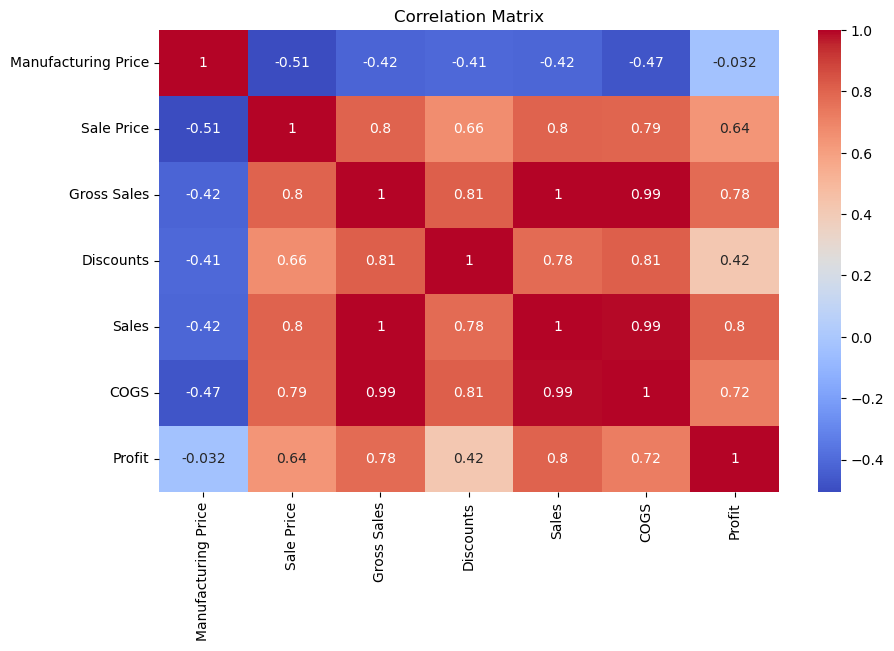

In [60]:
import seaborn as sns

numeric_columns = ['Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [61]:
# Calculate profit margin based on sales
df['Profit Margin (Sales)'] = df['Profit'] / df['Sales']

# Calculate profit margin based on gross sales
df['Profit Margin (Gross Sales)'] = df['Profit'] / df['Gross Sales']

# Print the profit margin columns
print(df[['Profit Margin (Sales)', 'Profit Margin (Gross Sales)']])

     Profit Margin (Sales)  Profit Margin (Gross Sales)
53                0.278499                     0.275714
54                0.326599                     0.323333
55                0.278499                     0.275714
56                0.278499                     0.275714
57                0.278499                     0.275714
..                     ...                          ...
695               0.019608                     0.016667
696               0.019608                     0.016667
697               0.159664                     0.135714
698               0.159664                     0.135714
699               0.705882                     0.600000

[647 rows x 2 columns]


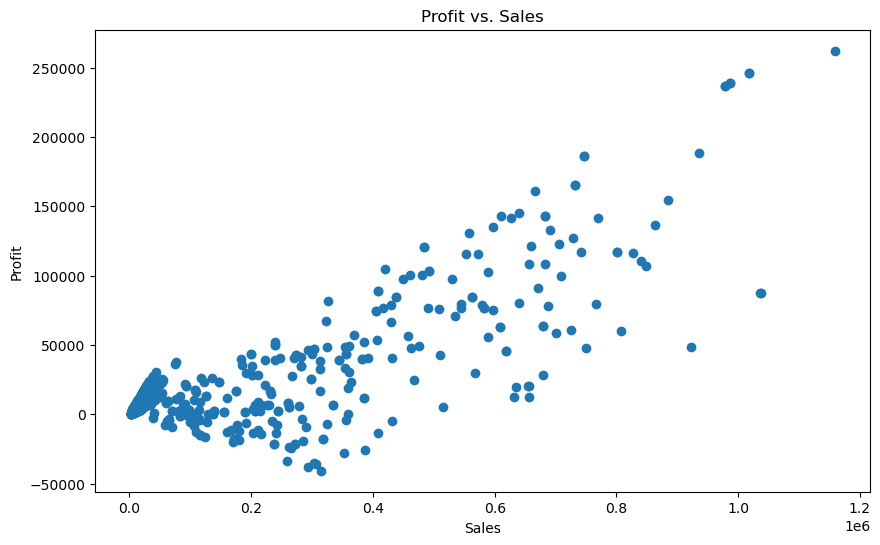

In [62]:
import matplotlib.pyplot as plt

# Scatter plot: Profit vs. Sales
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Profit vs. Sales')
plt.show()

### Looking at Date

In [63]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Profit Margin (Sales),Profit Margin (Gross Sales)
53,Government,France,Paseo,Low,3945.0,0.278499,7,27615.0,276,27338.85,19725,7613.85,2014-01-01,0.278499,0.275714
54,Midmarket,France,Paseo,Low,2296.0,0.326599,15,34440.0,344,34095.60,22960,11135.60,2014-02-01,0.326599,0.323333
55,Government,France,Paseo,Low,1030.0,0.278499,7,7210.0,72,7137.90,5150,1987.90,2014-05-01,0.278499,0.275714
56,Government,France,Velo,Low,639.0,0.278499,7,4473.0,45,4428.27,3195,1233.27,2014-11-01,0.278499,0.275714
57,Government,Canada,VTT,Low,1326.0,0.278499,7,9282.0,93,9189.18,6630,2559.18,2014-03-01,0.278499,0.275714


In [65]:
# Set 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

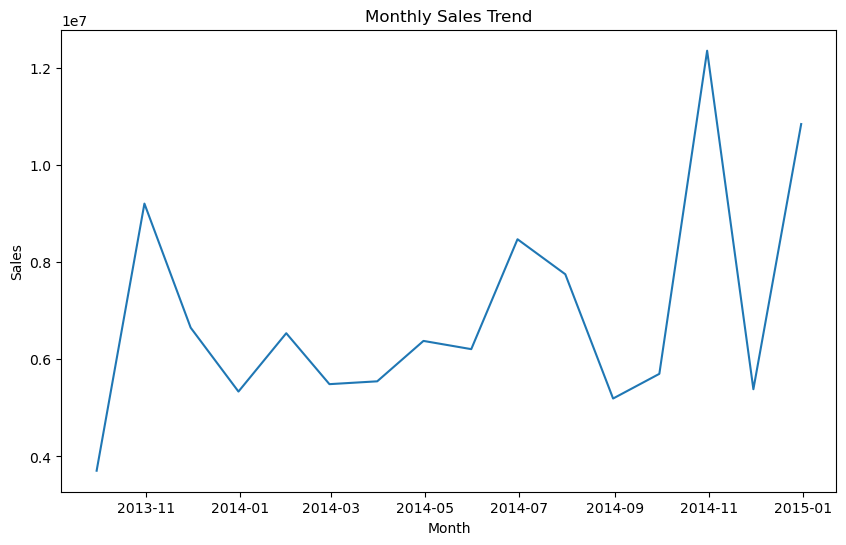

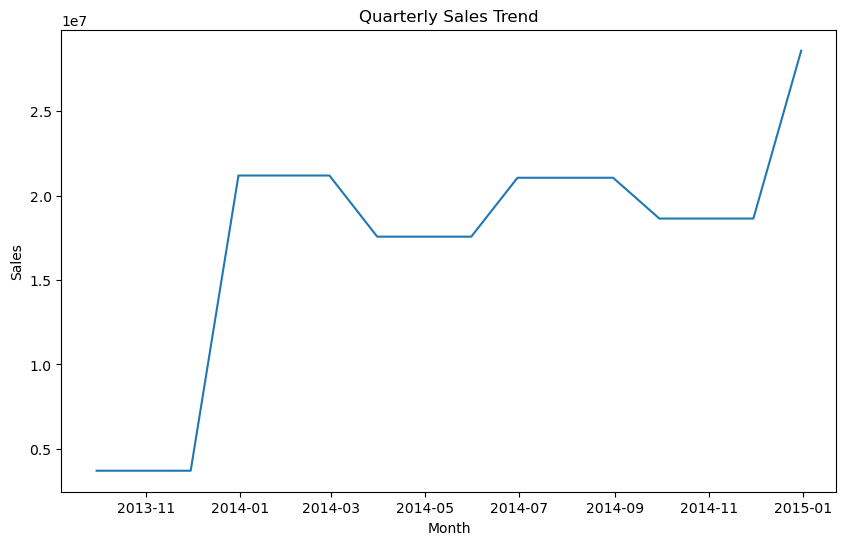

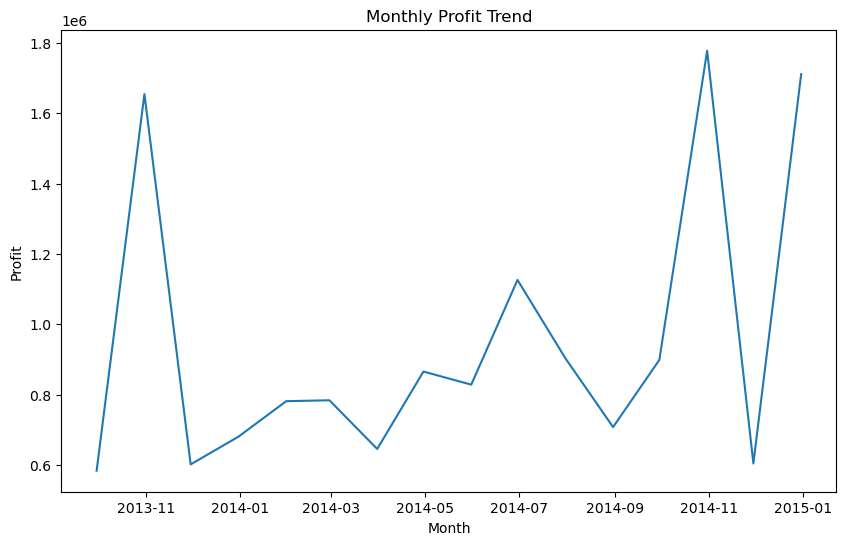

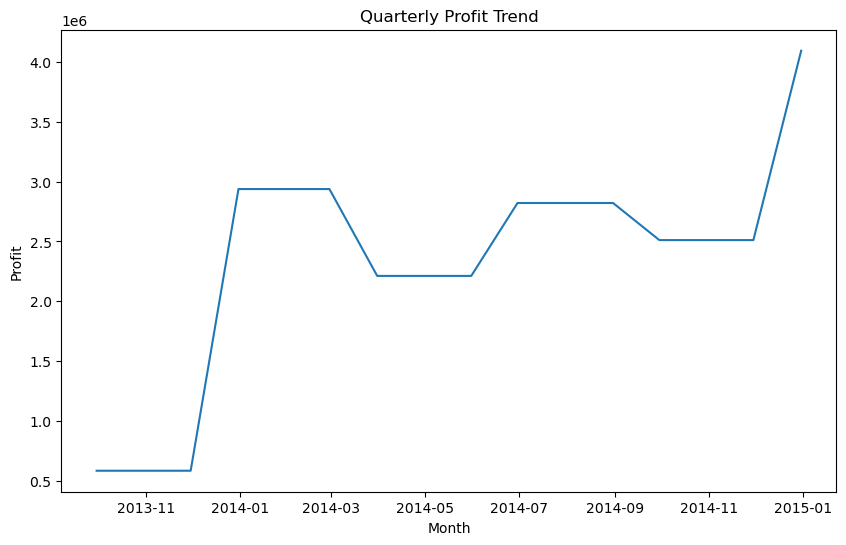

In [66]:
# Resample sales and profit data to monthly frequency
monthly_sales = df['Sales'].resample('M').sum()
monthly_profit = df['Profit'].resample('M').sum()

# Repeat quarterly sales for each month within the quarter
quarterly_sales = df['Sales'].resample('Q').sum().reindex(monthly_sales.index, method='ffill')

# Repeat quarterly profit for each month within the quarter
quarterly_profit = df['Profit'].resample('Q').sum().reindex(monthly_profit.index, method='ffill')

# Create a DataFrame from the aggregated sales and profit data
data = {
    'Monthly Sales': monthly_sales,
    'Quarterly Sales': quarterly_sales,
    'Monthly Profit': monthly_profit,
    'Quarterly Profit': quarterly_profit
}

df_aggregated = pd.DataFrame(data)

# Plot monthly sales
plt.plot(df_aggregated.index, df_aggregated['Monthly Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

# Plot quarterly sales
plt.plot(df_aggregated.index, df_aggregated['Quarterly Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Quarterly Sales Trend')
plt.show()

# Plot monthly profit
plt.plot(df_aggregated.index, df_aggregated['Monthly Profit'])
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Trend')
plt.show()

# Plot quarterly profit
plt.plot(df_aggregated.index, df_aggregated['Quarterly Profit'])
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Quarterly Profit Trend')
plt.show()

In [67]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Profit Margin (Sales),Profit Margin (Gross Sales)
Date,,,,,,,,,,,,,,
2014-01-01,Government,France,Paseo,Low,3945.0,0.278499,7,27615.0,276,27338.85,19725,7613.85,0.278499,0.275714
2014-02-01,Midmarket,France,Paseo,Low,2296.0,0.326599,15,34440.0,344,34095.60,22960,11135.60,0.326599,0.323333
2014-05-01,Government,France,Paseo,Low,1030.0,0.278499,7,7210.0,72,7137.90,5150,1987.90,0.278499,0.275714
2014-11-01,Government,France,Velo,Low,639.0,0.278499,7,4473.0,45,4428.27,3195,1233.27,0.278499,0.275714
2014-03-01,Government,Canada,VTT,Low,1326.0,0.278499,7,9282.0,93,9189.18,6630,2559.18,0.278499,0.275714


### Checking for outliers 

<Axes: >

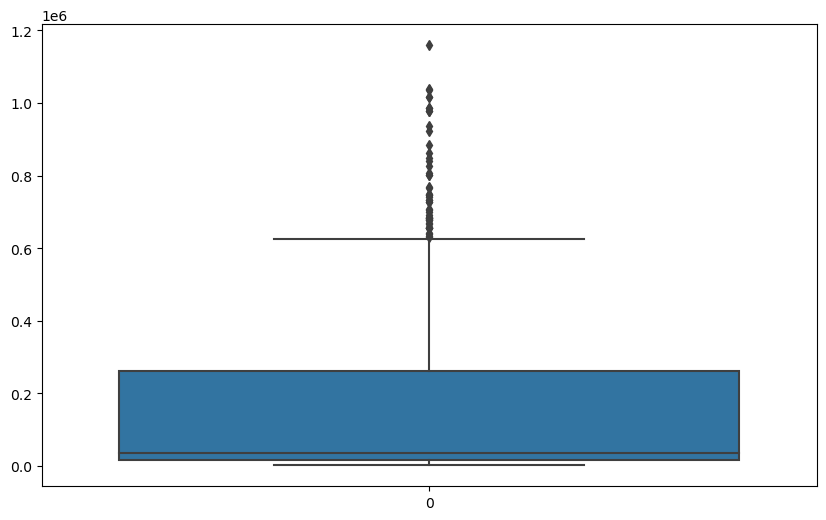

In [68]:
#Checking for outliers in Sales
sns.boxplot(df['Sales'])
plt.show()
#As we can see, there are outliers above about 0.65 or 0.7

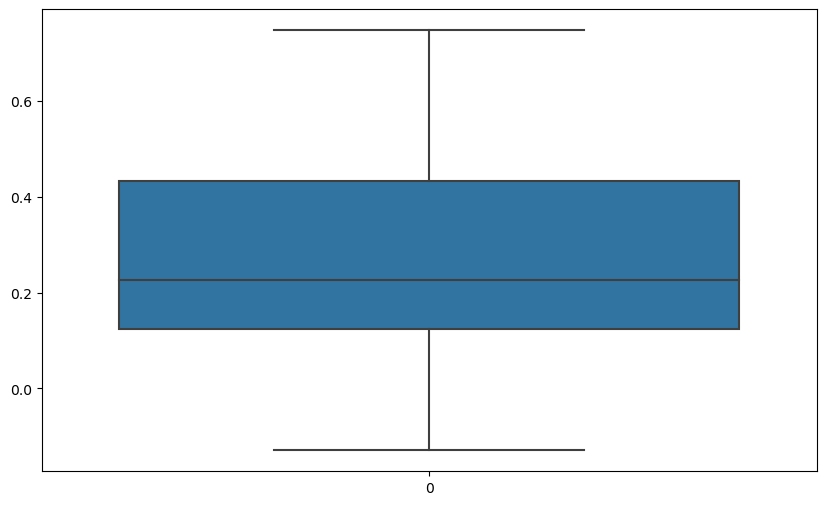

In [69]:
#Checking for outliers in Manufacturing Price
sns.boxplot(df['Manufacturing Price'])
plt.show()
#As we can see, there is no outliers in Manufacturing Price

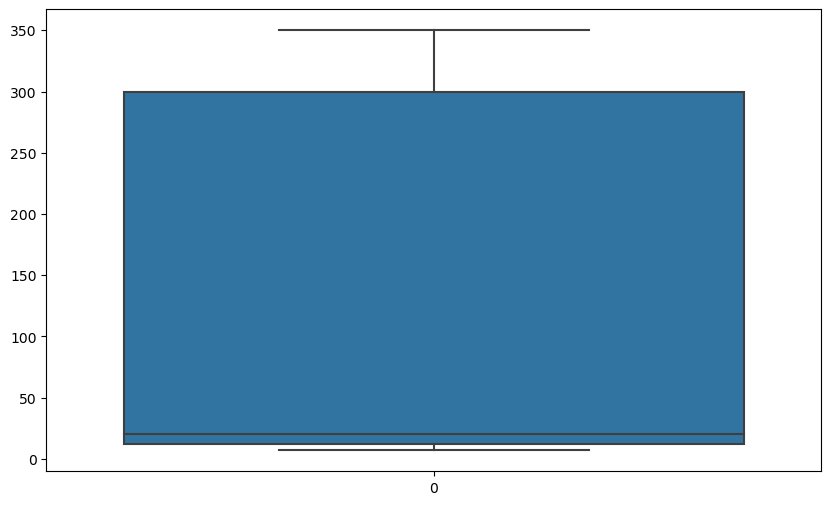

In [70]:
#Checking for outliers in Sale Price
sns.boxplot(df['Sale Price'])
plt.show()
#As we can see, there is no ouliers in Sale Price

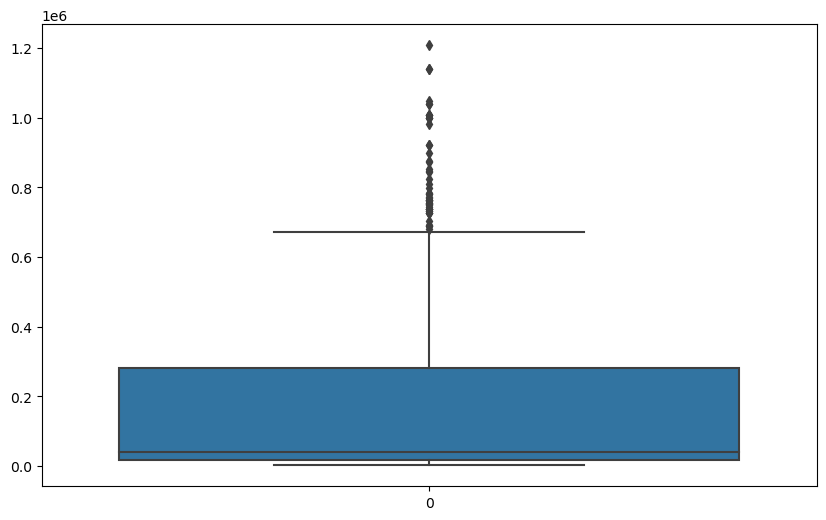

In [71]:
#Checking for outliers in Gross Sales
sns.boxplot(df['Gross Sales'])
plt.show()
#As we can see, there are outliers nearly above 0.7

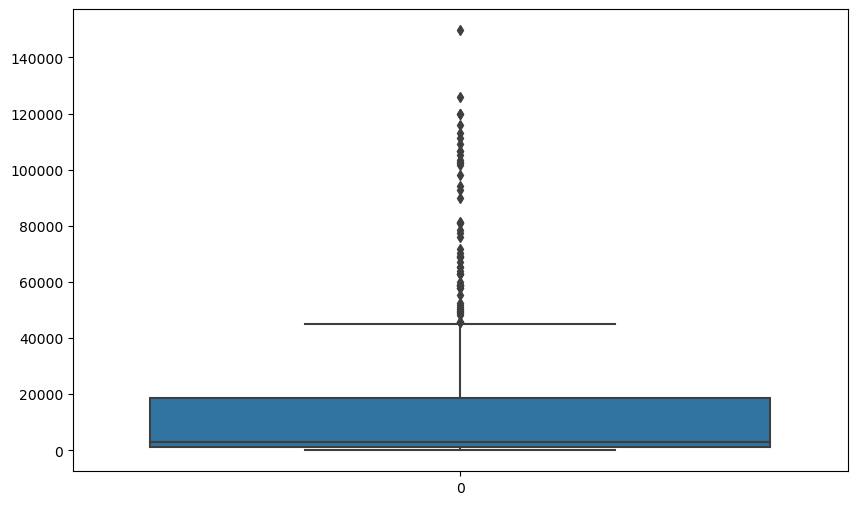

In [72]:
#Checking for outliers in Discounts
sns.boxplot(df['Discounts'])
plt.show()
#As we can see from the graph, we can notice outliers 

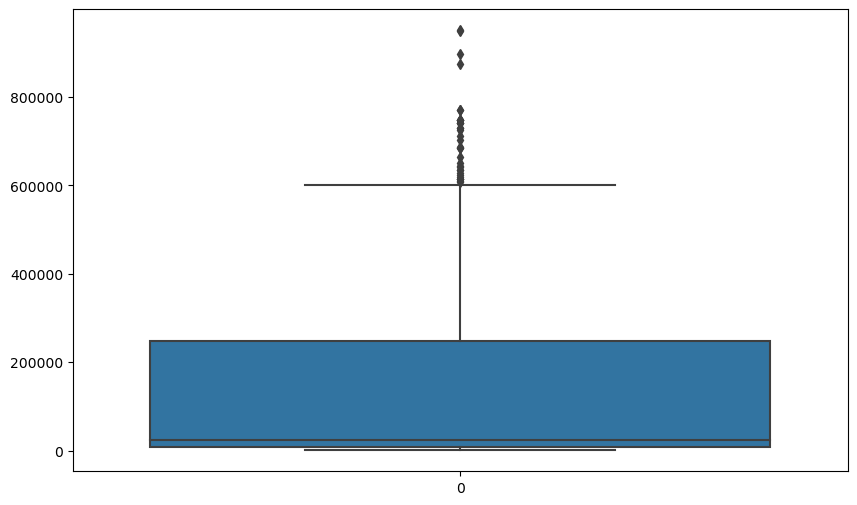

In [73]:
#Checking for outliers in COGS
sns.boxplot(df['COGS'])
plt.show()
#As we can see, there are outliers in COGS

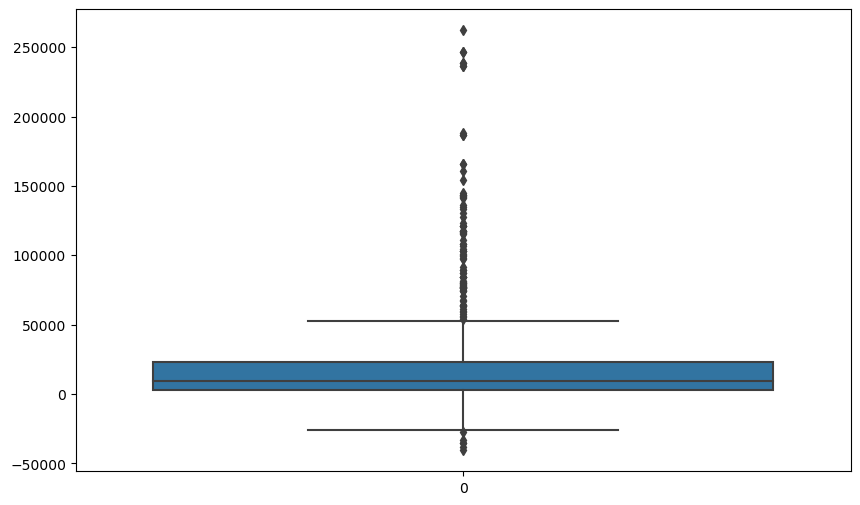

In [74]:
#Checking for outliers in Profit
sns.boxplot(df['Profit'])
plt.show()